# K Nearest Neighbors

In this lab experiment I am going to perform classification task on Adult census dataset that I have used previously. As the data cleaning and pre-processing is already completed in the previous notebooks I am directly importing the final csv file in this one.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('final_income_classification.csv')

In [3]:
df

,age,workclass,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,income,...,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,occupation_Sales
0,90,0,77053,9,-3,0,0,4356,40,0,...,0,0,0,1,0,0,0,1,0,0
1,82,6,132870,9,-3,0,0,4356,18,0,...,0,0,0,1,0,0,1,0,0,0
2,66,0,186061,10,-3,0,0,4356,40,0,...,0,1,0,0,0,0,0,1,0,0
3,54,6,140359,4,-2,0,0,3900,40,0,...,0,0,0,1,0,0,0,1,0,0
4,41,6,264663,10,-1,0,0,3900,40,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,6,310152,10,0,1,0,0,40,0,...,0,0,0,1,0,0,0,1,0,0
32557,27,6,257302,12,2,0,0,0,38,0,...,0,0,0,1,0,0,0,1,0,0
32558,40,6,154374,9,2,1,0,0,40,1,...,0,0,0,1,0,0,0,1,0,0
32559,58,6,151910,9,-3,0,0,0,40,0,...,0,0,0,1,1,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   age                         32561 non-null  int64
 1   workclass                   32561 non-null  int64
 2   fnlwgt                      32561 non-null  int64
 3   education.num               32561 non-null  int64
 4   marital.status              32561 non-null  int64
 5   sex                         32561 non-null  int64
 6   capital.gain                32561 non-null  int64
 7   capital.loss                32561 non-null  int64
 8   hours.per.week              32561 non-null  int64
 9   income                      32561 non-null  int64
 10  Race_Amer-Indian-Eskimo     32561 non-null  int64
 11  Race_Asian-Pac-Islander     32561 non-null  int64
 12  Race_Black                  32561 non-null  int64
 13  Race_Other                  32561 non-null  int64
 14  Race_W

In [5]:
df.describe()

,age,workclass,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,income,...,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,occupation_Sales
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,5.178803,1.897784e+05,10.080679,0.538958,0.669205,1077.648844,87.303830,40.437456,0.240810,...,0.031909,0.095943,0.008323,0.854274,0.115783,0.125887,0.124873,0.394214,0.127146,0.112097
std,13.640433,1.729629,1.055500e+05,2.572720,1.555730,0.470506,7385.292085,402.960219,12.347429,0.427581,...,0.175761,0.294518,0.090851,0.352837,0.319969,0.331727,0.330580,0.488689,0.333142,0.315491
min,17.000000,0.000000,1.228500e+04,1.000000,-3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,5.000000,1.178270e+05,9.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,6.000000,1.783560e+05,10.000000,0.000000,1.000000,0.000000,0.000000,40.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,6.000000,2.370510e+05,12.000000,2.000000,1.000000,0.000000,0.000000,45.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,90.000000,7.000000,1.484705e+06,16.000000,3.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

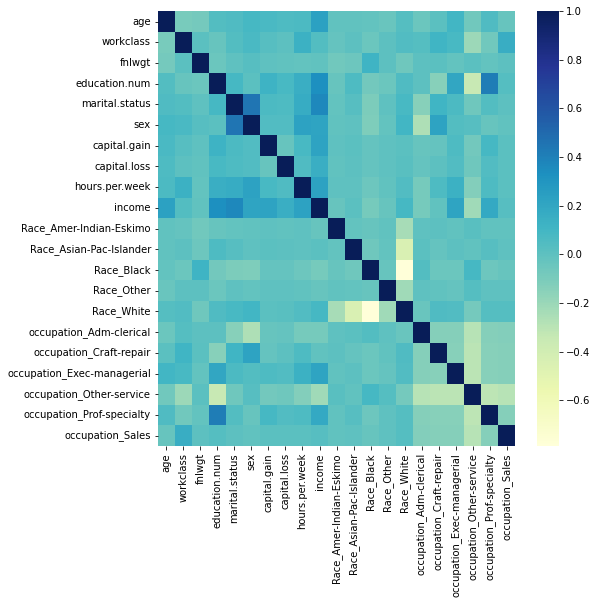

In [6]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap="YlGnBu")

<AxesSubplot:xlabel='income', ylabel='count'>

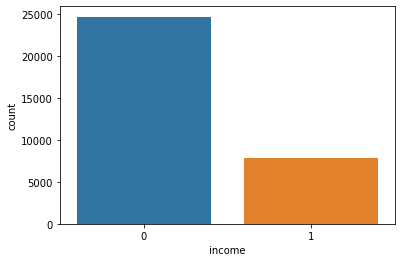

In [7]:
sns.countplot(x='income', data=df)

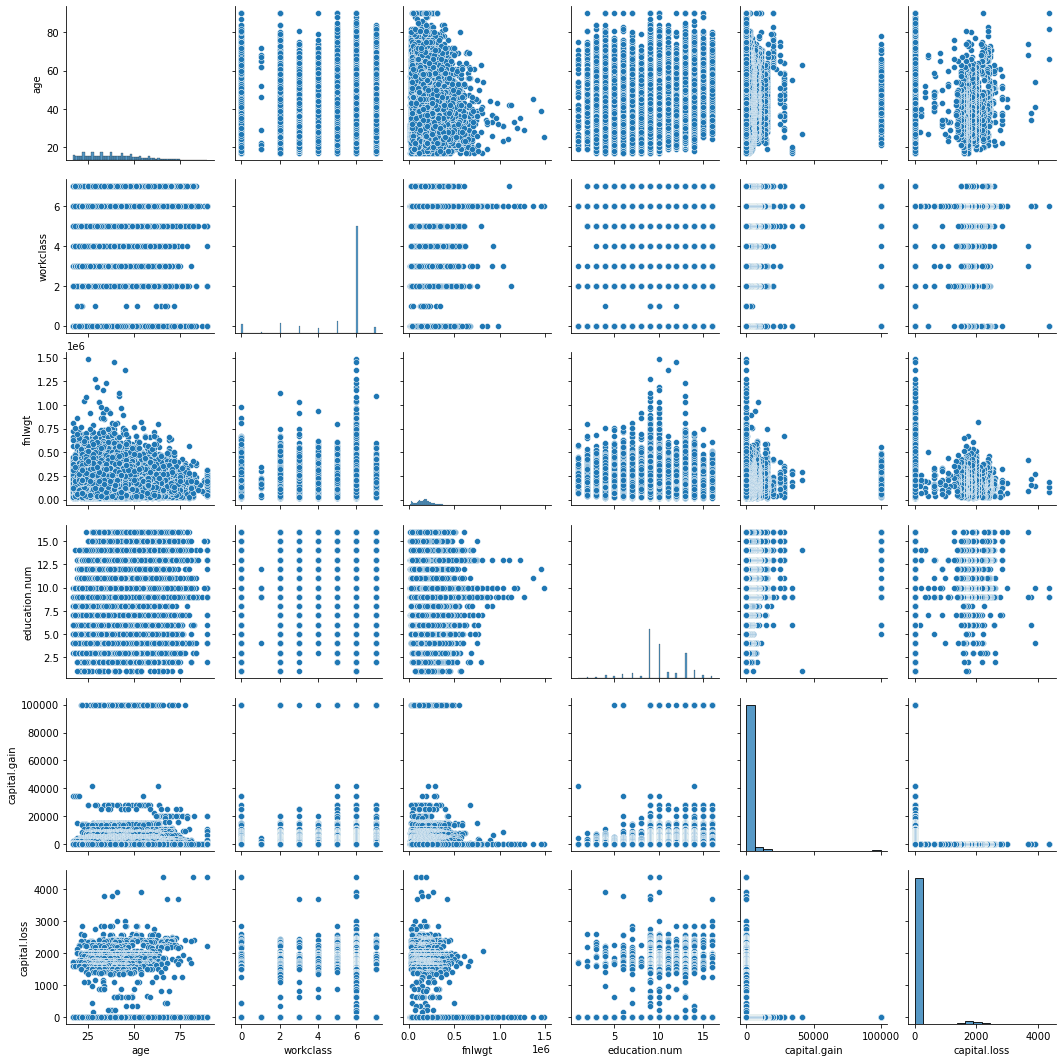

In [8]:
sns.pairplot(df[['age', 'workclass', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss']])

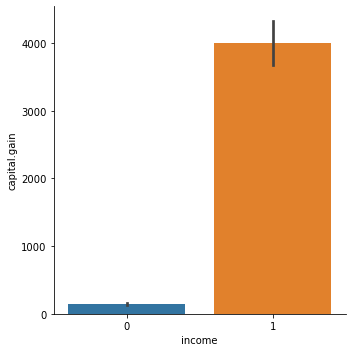

In [9]:
sns.catplot(x='income', y='capital.gain',kind="bar", data=df)

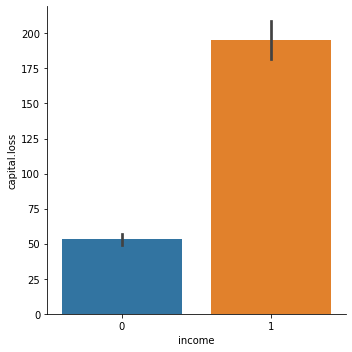

In [10]:
sns.catplot(x='income', y='capital.loss',kind="bar", data=df)

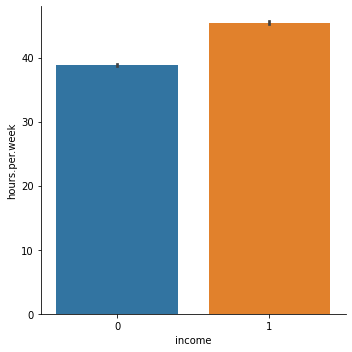

In [11]:
sns.catplot(x='income', y='hours.per.week',kind="bar", data=df)

## Data Scaling and Spliting

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Here we are splitting the dataset into X and y then further into training and testing with the same random state of 42 as taken previously so we can compare the results in the end.

In [13]:
X = df.drop('income', axis=1)
y = df['income']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Now we Standardize the dataset so that all the values can be compared among each other and it is also better for the model to understand the data.

In [15]:
standard_scalar = StandardScaler()

In [16]:
standard_scalar.fit(X_train)

StandardScaler()

In [17]:
X_scaled_train = standard_scalar.transform(X_train)
X_scaled_test = standard_scalar.transform(X_test)

In [18]:
X_scaled_train

array([[ 1.42910881,  0.47563644,  0.96194408, ..., -0.80225578,
        -0.38257489, -0.35477381],
       [ 1.72352858,  0.47563644, -0.76197267, ..., -0.80225578,
        -0.38257489,  2.81869738],
       [-0.41101475,  0.47563644, -0.49914857, ...,  1.24648525,
        -0.38257489, -0.35477381],
       ...,
       [ 1.20829398, -0.68286805,  0.46275431, ...,  1.24648525,
        -0.38257489, -0.35477381],
       [ 0.17782479,  0.47563644, -0.33752484, ..., -0.80225578,
        -0.38257489, -0.35477381],
       [-1.22066912,  0.47563644, -0.25579011, ...,  1.24648525,
        -0.38257489, -0.35477381]])

## Model Training

Now we will perform hyperparameter tuning and see what value of K will best suit our model

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
K_values = []
Accuracy = []

In [22]:
for i in range(1, 20):
    tunning_model = KNeighborsClassifier(n_neighbors=i, weights='distance')
    tunning_model.fit(X_scaled_train, y_train)
    tunning_y_pred = tunning_model.predict(X_scaled_test)
    K_values.append(i)
    Accuracy.append(accuracy_score(y_test, tunning_y_pred))

print(K_values)
print(Accuracy)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0.8042788412324701, 0.8042788412324701, 0.8229092025795884, 0.8243423072985976, 0.8284368922100522, 0.8326338417442932, 0.8341693110860886, 0.8366260620329614, 0.8375473436380387, 0.8379568021291841, 0.8341693110860886, 0.8370355205241069, 0.8373426143924659, 0.839594636093766, 0.8370355205241069, 0.8376497082608251, 0.8357047804278841, 0.8381615313747569, 0.8376497082608251]


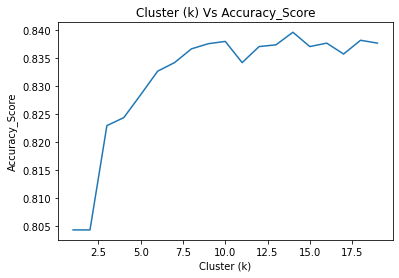

In [23]:
plt.title("Cluster (k) Vs Accuracy_Score")
plt.xlabel("Cluster (k)")
plt.ylabel("Accuracy_Score")
plt.plot(K_values, Accuracy)
plt.show()

We will now plot a graph so we can better visulize and understand how with varying values of K the accuracy changes.

In [24]:
max_accuracy_k_value = max(Accuracy)
print(max_accuracy_k_value)
print("K Value for best accuracy: ", K_values[Accuracy.index(max_accuracy_k_value)])

0.839594636093766
K Value for best accuracy:  14


## Final Model Evaluation

In [25]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, plot_precision_recall_curve, plot_roc_curve

Now we will make our final model with K value as 14 (our best accuracy model from above) and check rest of the performance metrics on it.

In [26]:
model = KNeighborsClassifier(n_neighbors=14, weights='distance')
model.fit(X_scaled_train, y_train)

KNeighborsClassifier(n_neighbors=14, weights='distance')

In [27]:
y_pred = model.predict(X_scaled_test)

In [28]:
print("Accuracy score obtained:",accuracy_score(y_test, y_pred))

Accuracy score obtained: 0.839594636093766


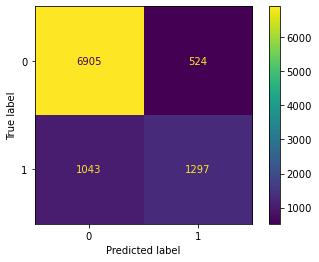

In [29]:
plot_confusion_matrix(model, X_scaled_test, y_test)

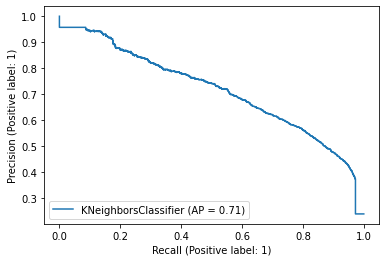

In [30]:
plot_precision_recall_curve(model, X_scaled_test, y_test)

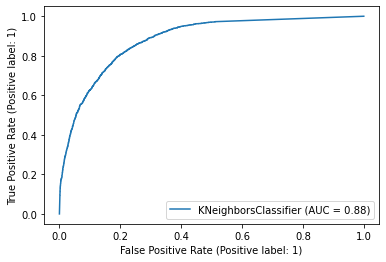

In [31]:
plot_roc_curve(model, X_scaled_test, y_test)

On comparing this model with our previous models we can see that it performs better than naive bayes and decision tree which had an accuracy of 82.91% and 81.40% where as logistic regression is still in lead with a score of 84.45%. In terms of ROC values we can see that again that is better than naiye bayes and decision which had 0.87 and 0.75 while this has 0.88 but still lesser than Logistic regression which could achieve 0.89